## Real Stock-Bond returns 1793-2023

Explore Edward McQuarrie's novel data set of stock and bond returns going back to 1793.

- Become familiar with data
- Clean the data as necessary
- Ask select questions  
&emsp; - Do stocks outperform bonds?  
&emsp; - Are there significant periods where bonds outperformed?  
&emsp; - What are the maximum and minimum returns one can expect? 

## Table of Contents

1. [Load/Clean](#Loading-and-Cleaning)
2. [Exploring Stock Returns](#Explore-Stock-Returns)
3. [Exploring Bond Returns](#Explore-Bond-Returns)
4. [Stocks and Bonds](#Stocks-and-Bonds)
    * [Lowest Rolling Returns](#Years-where-rolling-returns-were-lowest) 
    * [Highest Rolling Returns](#Years-where-rolling-returns-were-highest)
    * [Stocks v Bonds - Minimum Rolling Return for all Term lengths](#Plot-Stock/Bond-minimum-rolling-returns)
    * [Stocks v Bonds - Real Returns](#Stock/Bond-Real-Returns)
        * [10 Year Periods](#10-year-annualized-real-Stock-and-Bond-returns)
        * [30 Year Periods](#30-year-annualized-real-Stock-and-Bond-returns)
        * [50 Year Periods](#50-year-annualized-real-Stock-and-Bond-returns)
        * [100 Year Periods](#100-year-annualized-real-Stock-and-Bond-returns)
    * [Stocks v Bonds - Highest and Lowest Return Years 10/30/50/100 yr periods](#The-highest-and-lowest-returns-for-stocks-and-bonds)
        * [Lowest Return Years](#Years-where-Rolling-Returns-were-Lowest)
        * [Highest Return Years](#Years-where-Rolling-Returns-were-Highest)
    * [Stocks v Bonds - Distribution of Best and Worst Years](#Distribution-of-Best-and-Worst-Years)
        * [Stocks](#Stocks,-Best-and-Worst-Years)
        * [Bonds](#Bonds,-Best-and-Worst-Years)
        * [Bonds and 1982](#Bonds-and-1982)        

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
from pathlib import Path
import scipy.stats as st

In [6]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container {width:90% !important;}</style>"))
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))
import warnings
warnings.filterwarnings('ignore')

In [7]:
pwd

'C:\\Users\\CherKare\\Desktop\\Data Analysis\\Data Analysis Projects\\Python Based\\Stocks_Bonds_Mcquarrie_Analysis'

### Loading and Cleaning

In [9]:
# open csv file to work on
stock_bond_data = pd.read_csv('Data/mcquarrie_real_stock_bond_returns_prepped_csv.csv')

# see the columns and rows as necessary
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)

stock_bond_data.tail(5)

,To January of:,Measuring Worth inflation index (annual),MW 2 yr smoothed,CPI-U January values fr 1913,annual_inflation_relative,nominal_stock_return,real_stock_return,nominal_bond_return,real_bond_return,real_stock_index,real_bond_index,rolling_ten_stocks,rolling_ten_bonds,rolling_thirty_stocks,rolling_thirty_bonds,rolling_fifty_stocks,rolling_fifty_bonds,rolling_hundred_stocks,rolling_hundred_bonds
227,2019,NaN,NaN,251.712,1.015512,-0.029244,-0.044072,0.003409,-0.011919,582339.4915,9361.190722,0.122062,0.058908,0.070803,0.053255,0.054421,0.039000,0.070160,0.028453
228,2020,NaN,NaN,257.971,1.024866,0.203147,0.173956,0.236626,0.206623,683640.8515,11295.425840,0.107716,0.066863,0.074291,0.057738,0.062983,0.046144,0.071688,0.032266
229,2021,NaN,NaN,261.582,1.013998,0.206963,0.190301,0.060319,0.045682,813738.5927,11811.425050,0.104459,0.064001,0.080445,0.057732,0.065074,0.044109,0.075042,0.032096
230,2022,NaN,NaN,281.148,1.074799,0.184505,0.102072,-0.039668,-0.106500,896798.4467,10553.504450,0.115901,0.033784,0.076201,0.049444,0.065115,0.041171,0.073874,0.028167
231,2023,NaN,NaN,299.170,1.064101,-0.083861,-0.139050,-0.155561,-0.206430,772098.9798,8374.946531,0.085048,0.006672,0.068402,0.037926,0.060482,0.035834,0.069452,0.024928


In [10]:
# summary statistics
stock_bond_data.describe()

,To January of:,Measuring Worth inflation index (annual),MW 2 yr smoothed,CPI-U January values fr 1913,annual_inflation_relative,nominal_stock_return,real_stock_return,nominal_bond_return,real_bond_return,real_stock_index,real_bond_index,rolling_ten_stocks,rolling_ten_bonds,rolling_thirty_stocks,rolling_thirty_bonds,rolling_fifty_stocks,rolling_fifty_bonds,rolling_hundred_stocks,rolling_hundred_bonds
count,232.000000,123.000000,122.000000,111.000000,230.000000,230.000000,230.000000,230.000000,230.000000,231.000000,231.000000,221.000000,221.000000,201.000000,201.000000,181.000000,181.000000,131.000000,131.000000
mean,1907.500000,10.027154,10.031639,85.733532,1.016290,0.089962,0.073940,0.058590,0.044705,54814.391351,1403.373691,0.062557,0.043295,0.061723,0.041893,0.060666,0.039493,0.061842,0.039543
std,67.116814,2.124591,2.105311,84.192755,0.052018,0.168957,0.166683,0.079873,0.099219,142785.797584,2246.189429,0.043832,0.040327,0.017076,0.027184,0.011369,0.022699,0.005881,0.016423
min,1792.000000,7.170000,7.210000,9.800000,0.889474,-0.482729,-0.424853,-0.228765,-0.243606,0.861040,0.745819,-0.038985,-0.054105,0.020015,-0.021256,0.038001,-0.006389,0.049570,0.015148
25%,1849.750000,8.380000,8.360000,17.450000,0.988008,-0.016318,-0.021488,0.022944,-0.008452,14.547389,26.464357,0.032327,0.011305,0.050041,0.023103,0.052421,0.018178,0.057780,0.022148
50%,1907.500000,9.320000,9.360000,34.100000,1.012665,0.082184,0.068677,0.055606,0.046383,661.161158,644.348267,0.064107,0.051203,0.061575,0.049058,0.059037,0.041171,0.060671,0.039542
75%,1965.250000,11.520000,11.491250,152.350000,1.033383,0.191845,0.175813,0.087609,0.098453,27152.751000,1641.335775,0.091629,0.071301,0.074668,0.064795,0.068227,0.061619,0.065374,0.052229
max,2023.000000,17.000000,16.235000,299.170000,1.250000,0.756461,0.716542,0.499158,0.566734,896798.446700,11811.425050,0.174861,0.138793,0.104338,0.087918,0.089079,0.073672,0.075086,0.066300


In [6]:
# how many nulls?
stock_bond_data.isnull().sum()

To January of:                                 0
Measuring Worth  inflation index (annual)    109
MW 2 yr smoothed                             110
CPI-U January values fr 1913                 121
annual_inflation_relative                      2
nominal_stock_return                           2
real_stock_return                              2
nominal_bond_return                            2
real_bond_return                               2
real_stock_index                               1
real_bond_index                                1
rolling_ten_stocks                            11
rolling_ten_bonds                             11
rolling_thirty_stocks                         31
rolling_thirty_bonds                          31
rolling_fifty_stocks                          51
rolling_fifty_bonds                           51
rolling_hundred_stocks                       101
rolling_hundred_bonds                        101
dtype: int64

In [11]:
# Rename col'To January of:' to 'year'
stock_bond_data.rename(columns = {'To January of:':'year'}, inplace = True)
stock_bond_data.head(1)

,year,Measuring Worth inflation index (annual),MW 2 yr smoothed,CPI-U January values fr 1913,annual_inflation_relative,nominal_stock_return,real_stock_return,nominal_bond_return,real_bond_return,real_stock_index,real_bond_index,rolling_ten_stocks,rolling_ten_bonds,rolling_thirty_stocks,rolling_thirty_bonds,rolling_fifty_stocks,rolling_fifty_bonds,rolling_hundred_stocks,rolling_hundred_bonds
0,1792,9.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# List out the columns 
stock_bond_data.columns

Index(['year', 'Measuring Worth  inflation index (annual)', 'MW 2 yr smoothed',
       'CPI-U January values fr 1913', 'annual_inflation_relative',
       'nominal_stock_return', 'real_stock_return', 'nominal_bond_return',
       'real_bond_return', 'real_stock_index', 'real_bond_index',
       'rolling_ten_stocks', 'rolling_ten_bonds', 'rolling_thirty_stocks',
       'rolling_thirty_bonds', 'rolling_fifty_stocks', 'rolling_fifty_bonds',
       'rolling_hundred_stocks', 'rolling_hundred_bonds'],
      dtype='object')

In [13]:
# Form the dataframes to be used in the analysis 
# Create a new dataframe
stock_bond_returns = stock_bond_data.copy()

# Drop unnecessary columns
stock_bond_returns = stock_bond_returns.drop(columns=['Measuring Worth  inflation index (annual)','MW 2 yr smoothed','CPI-U January values fr 1913'])

# Stock Returns Only
stock_returns = stock_bond_returns[['year', 'annual_inflation_relative',
       'nominal_stock_return', 'real_stock_return', 'real_stock_index',
       'rolling_ten_stocks', 'rolling_thirty_stocks','rolling_fifty_stocks', 'rolling_hundred_stocks']]

# Bond Returns Only
bond_returns = stock_bond_returns[['year', 'annual_inflation_relative',
       'nominal_bond_return', 'real_bond_return', 'real_bond_index',
       'rolling_ten_bonds', 'rolling_thirty_bonds', 'rolling_fifty_bonds', 'rolling_hundred_bonds']]


## Explore Stock Returns

### Summary Statistics
- Mean, Median, Min/Max, Standard Dev
- Look at centrality with box plots

> **Real Annualized Stock Returns**  
> &emsp; Mean: 7.4%, Median: 6.9%, Min: -42.5%, Max: 71.7%, Standard Dev: 16.7%,  n: 231 <br>
>> Rolling 10yr Annualized=> &ensp;  Mean: 6.3%, &nbsp; Median: 6.4%, &nbsp; Min:  -3.9%, &nbsp; Max: 17.5%, &nbsp; Standard Dev: 4.4%, &ensp; n: 221 <br>
> Rolling 30yr Annualized=> &ensp;   Mean: 6.2%, &nbsp; Median: 6.2%, &nbsp; Min:   2.0%, &nbsp; Max: 10.4%, &ensp; Standard Dev:  1.7%, &ensp; n: 201 <br>
> Rolling 50yr Annualized=> &ensp;   Mean: 6.1%, &nbsp; Median: 5.9%, &nbsp; Min:   3.8%, &nbsp; Max:  8.9%, &ensp;&nbsp; Standard Dev:  1.1%, &ensp; n: 181 <br>
> Rolling 100yr Annualized=> &nbsp;  Mean: 6.2%, &nbsp; Median: 6.1%, &nbsp; Min:   5.0%, &nbsp; Max:  7.5%, &ensp; Standard Dev:  0.6%, &ensp; n: 131

### Analysis
- Minimum returns for roll periods.
- **How long does a historical investor have to wait to assure positive returns?**
> At least **18 years** for a better than 0% return and **30 years** for a greater than 2% return

### Stock History

- Return Profile

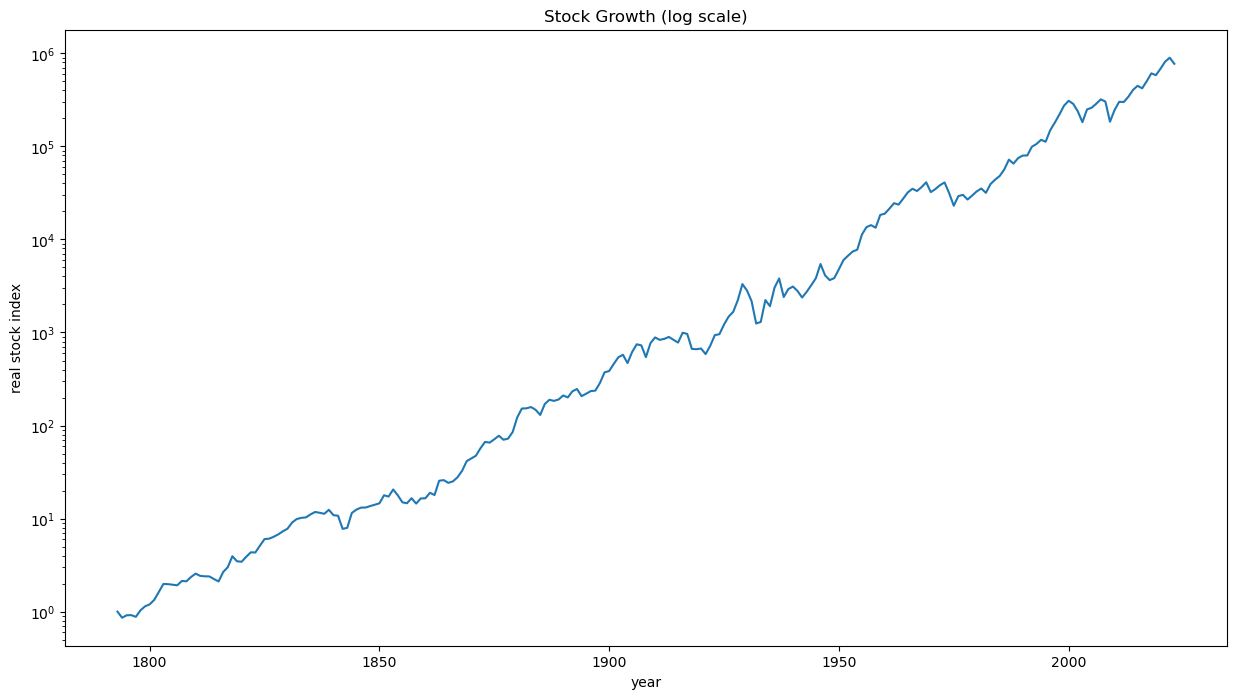

In [16]:
plt.figure(figsize=(15,8))

sns.lineplot(data=stock_returns, x='year', y='real_stock_index')
plt.title("Stock Growth (log scale)")
plt.ylabel('real stock index')
plt.yscale('log')

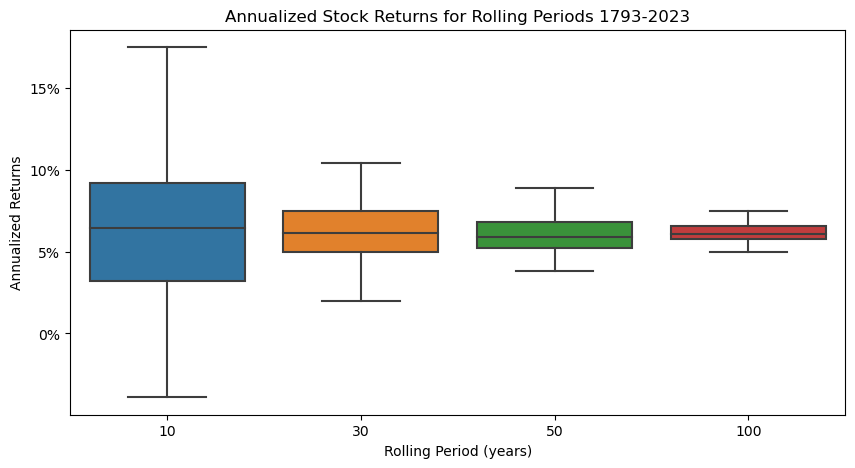

In [19]:
# Use the geometric returns make a database of just rolling stock returns
rolling_stock_returns=stock_returns[['rolling_ten_stocks', 'rolling_thirty_stocks','rolling_fifty_stocks', 'rolling_hundred_stocks']]

# boxplots of rolling returns
plt.figure(figsize=(10,5))

# all columns as a boxplot on the same figure
ax = sns.boxplot(x='variable', y='value', data=pd.melt(rolling_stock_returns))
ax.set(xlabel='Rolling Period (years)', ylabel='Annualized Returns', title='Annualized Stock Returns for Rolling Periods 1793-2023')

# change y-axis ticks from floating to percentage
y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

# change x-axis labels
x_value=['10', '30', '50', '100']
ax.set_xticklabels(x_value)

plt.show()

In [35]:
# populate a dataframe with the minimum return one can expect from a given roll period (in years)
# create an empty dictionary object to store the roll period and minimum annualized return
cagr_roll_dict = {"period":[], "min_cagr":[]}

# Keep track of # of years to guarantee a minimum return
guarantee_0 = False
guarantee_2 = False

# i is the period or number of years in the roll period
for i in range(1,43):
    n = i
    cagr = []
    for x in range(i, 231):
            f = stock_returns.real_stock_index[x+1-n]
            l = stock_returns.real_stock_index[x+1]
            # cagr with term i in years
            cagr_x = (l/f)**(1/n)-1
            # create a list of cagr's for the nth roll period
            cagr.append(cagr_x)
    cagr_min = min(cagr)
    cagr_roll_dict["period"].append(n)
    cagr_roll_dict["min_cagr"].append(cagr_min)
    if cagr_min >= .02 and guarantee_2 == False:
        stock_percent_2 = i
        guarantee_2 = True
    if cagr_min < .02 and guarantee_2 == True:
        guarantee_2 = False
    if cagr_min >= 0 and guarantee_0 == False:
        stock_percent_0 = i
        guarantee_0 = True
    if cagr_min < 0 and guarantee_0 == True:
        guarantee_0 = False

# Convert the dictionary of roll periods and returns to a dataframe    
stock_cagr_roll = pd.DataFrame.from_dict(cagr_roll_dict)

print(f"Minimum number of years to guarantee a non_negative return: {stock_percent_0}")
print(f"Minimum number of years to guarantee a 2% or better return: {stock_percent_2}")

Minimum number of years to guarantee a non_negative return: 18
Minimum number of years to guarantee a 2% or better return: 30


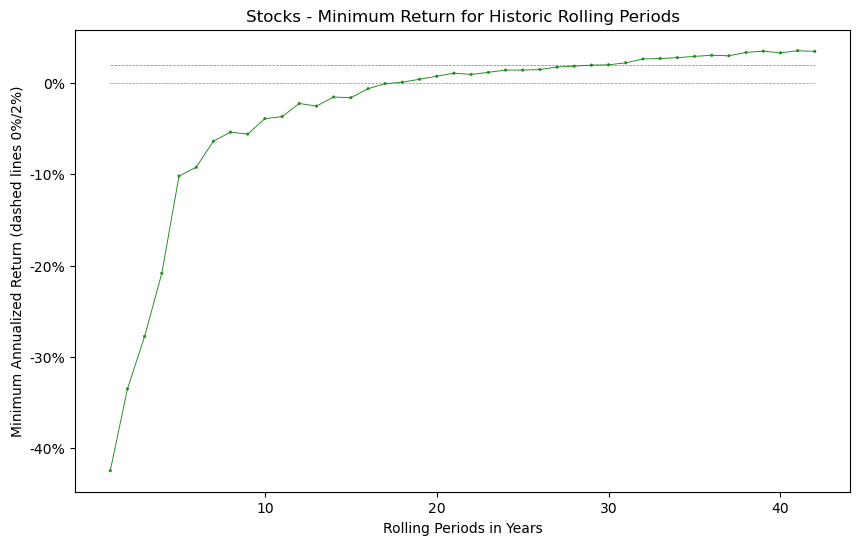

In [36]:
# plot the roll return dataframe (cagr_roll)
plt.figure(figsize=(10,6))
# plot minimum returns for different roll periods
ax = sns.pointplot(data=stock_cagr_roll, x='period', y='min_cagr', color='forestgreen', scale=.25)
ax.set(xlabel='Rolling Periods in Years', ylabel='Minimum Annualized Return (dashed lines 0%/2%)', title='Stocks - Minimum Return for Historic Rolling Periods')
# change y-axis ticks to percent
y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_xticks([9,19,29,39])


# plot a dashed line level at zero
plt.plot([0, 41], [0, 0], linestyle='--', linewidth=.5, alpha=.75)
# plot another dashed line at 2
plt.plot([0, 41], [.02, .02], linestyle='--', linewidth=.5, color='firebrick', label='2%', alpha=.75)


plt.show()

## Explore Bond Returns

### Summary Statistics
- Mean, Median, Min/Max, Standard Dev
- Look at centrality with box plots

> **Real Annualized Bond Returns**  
> &emsp; Mean: 4.5%, Median: 4.6%, Min: -24.3%, Max: 56.7%, Standard Dev: 9.9%, n: 231 <br>
>> Rolling 10yr Annualized=> &ensp;  Mean: 4.3%, &nbsp; Median: 5.1%, &nbsp; Min:  -5.4%, &nbsp; Max: 13.9%, &nbsp; Standard Dev:  4.0%, &ensp; n: 221 <br>
> Rolling 30yr Annualized=> &ensp;   Mean: 4.2%, &nbsp; Median: 4.9%, &nbsp; Min:  -2.1%, &nbsp; Max: 8.8%, &ensp; Standard Dev:  2.7%, &ensp; n: 201 <br>
> Rolling 50yr Annualized=> &ensp;   Mean: 4.0%, &nbsp; Median: 4.1%, &nbsp; Min:   -0.6%, &nbsp; Max:  7.4%, &ensp;&nbsp; Standard Dev:  2.3%, &ensp; n: 181 <br>
> Rolling 100yr Annualized=> &nbsp;  Mean: 4.0%, &nbsp; Median: 4.0%, &nbsp; Min:   1.5%, &nbsp; Max:  6.6%, &ensp; Standard Dev:  1.6%, &ensp; n: 131

### Analysis
- Minimum returns for roll periods. 
- **How long does a historical investor have to wait to assure positive returns?**
> At least **71 years** for a >0% return and a staggering **108 years** for a >2% return

In [37]:
# create dataframe that just includes the roll returns for bonds
rolling_bond_returns = bond_returns[['rolling_ten_bonds', 'rolling_thirty_bonds', 'rolling_fifty_bonds', 'rolling_hundred_bonds']]

# summary statistics
# rolling_bond_returns.describe()

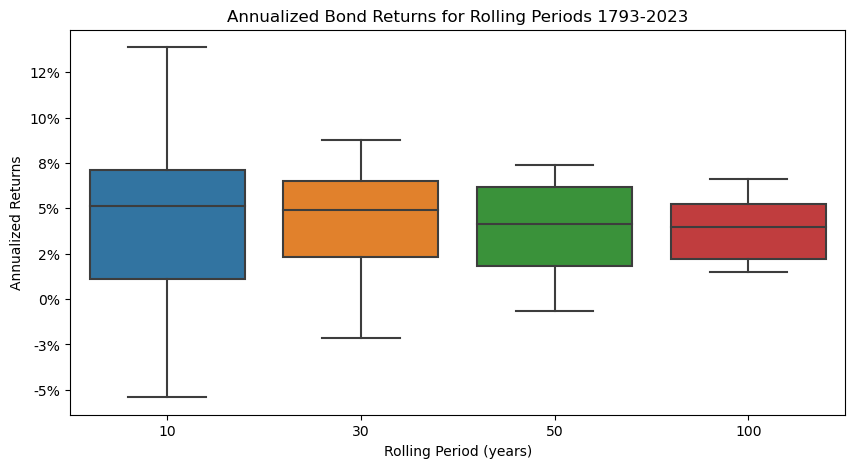

In [38]:
# boxplots of rolling returns
plt.figure(figsize=(10,5))

# all columns as a boxplot on the same figure, pd.melt is important for this
ax = sns.boxplot(x='variable', y='value', data=pd.melt(rolling_bond_returns))
ax.set(xlabel='Rolling Period (years)', ylabel='Annualized Returns', title='Annualized Bond Returns for Rolling Periods 1793-2023')
# change y-axis ticks from floating to percentage
y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
# change x-axis labels
x_value=['10', '30', '50', '100']
ax.set_xticklabels(x_value)


plt.show()

In [39]:
# populate a dataframe with the minimum return one can expect from a given roll period (in years)
# create an empty dictionary object to store the roll period and minimum annualized return
cagr_roll_dict = {"period":[], "min_cagr":[]}

# Keep track of # of years to guarantee a minimum return
guarantee_0 = False
guarantee_2 = False

# i is the period or number of years in the roll period
for i in range(1,231):
    n = i
    cagr = []
    for x in range(i, 231):
            f = bond_returns.real_bond_index[x+1-n]
            l = bond_returns.real_bond_index[x+1]
            # cagr with term i in years
            cagr_x = (l/f)**(1/n)-1
            # create a list of cagr's for the nth roll period
            cagr.append(cagr_x)
    #calculate the minimum annualized return
    cagr_min = min(cagr)
    cagr_roll_dict["period"].append(n)
    cagr_roll_dict["min_cagr"].append(cagr_min)
    if cagr_min >= .02 and guarantee_2 == False:
        stock_percent_2 = i
        guarantee_2 = True
    if cagr_min < .02 and guarantee_2 == True:
        guarantee_2 = False
    if cagr_min >= 0 and guarantee_0 == False:
        stock_percent_0 = i
        guarantee_0 = True
    if cagr_min < 0 and guarantee_0 == True:
        guarantee_0 = False

# Convert the dictionary of roll periods and returns to a dataframe    
bond_cagr_roll = pd.DataFrame.from_dict(cagr_roll_dict)

print(f"Minimum number of years to guarantee a non_negative return: {stock_percent_0}")
print(f"Minimum number of years to guarantee a 2% or better return: {stock_percent_2}")

Minimum number of years to guarantee a non_negative return: 71
Minimum number of years to guarantee a 2% or better return: 108


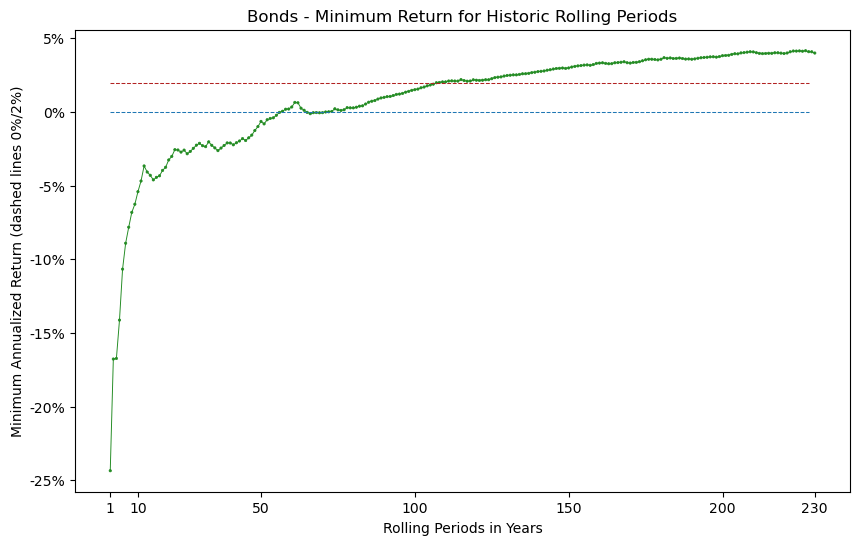

In [42]:
# plot the roll return dataframe (cagr_roll)
plt.figure(figsize=(10,6))
# plot minimum returns for different roll periods
ax = sns.pointplot(data=bond_cagr_roll, x='period', y='min_cagr', color='forestgreen', scale=.25)
ax.set(xlabel='Rolling Periods in Years', ylabel='Minimum Annualized Return (dashed lines 0%/2%)', title='Bonds - Minimum Return for Historic Rolling Periods')
# change y-axis ticks to percent
y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_xticks([0,9,49,99,149,199,229])

# plot a dashed line level at zero
plt.plot([0, 227], [0, 0], linestyle='--', linewidth=.75)
# plot another dashed line at 2
plt.plot([0, 227], [.02, .02], linestyle='--', linewidth=.75, color='firebrick')


plt.show()

### Stocks and Bonds

- Plot bond and stock rolling cagrs
- Side by Side Boxplots, Violin Plots

In [43]:
# extend out roll periods for stock returns, note: previously set to 42 periods
cagr_roll_dict = {"period":[], "min_cagr":[]}

# i is the period or number of years in the roll period
for i in range(1,231):
    n = i
    cagr = []
    for x in range(i, 231):
            f = stock_returns.real_stock_index[x+1-n]
            l = stock_returns.real_stock_index[x+1]
            # cagr with term i in years
            cagr_x = (l/f)**(1/n)-1
            # create a list of cagr's for the nth roll period
            cagr.append(cagr_x)
    cagr_min = min(cagr)
    cagr_roll_dict["period"].append(n)
    cagr_roll_dict["min_cagr"].append(cagr_min)

# Convert the dictionary of roll periods and returns to a dataframe    
stock_cagr_roll_all = pd.DataFrame.from_dict(cagr_roll_dict)

# stock_cagr_roll_all.head()

In [44]:
# create lists for new column 'security_type'
bond_cagr_roll_all = bond_cagr_roll
list_bonds=[]
list_stocks=[]
for i in range(len(bond_cagr_roll)):
    list_bonds.append("bond")
    list_stocks.append("stock")

# run to check list contents/length   
# print(list_bonds,list_stocks)
# print(len(list_bonds), len(list_stocks))

In [45]:
# run once to populate dataframes
bond_cagr_roll_all.insert(loc=0, column="security_type", value=list_bonds)
stock_cagr_roll_all.insert(loc=0, column="security_type", value=list_stocks)

In [46]:
# Combine stock and bond cagr_roll_all dataframes with a Union type join
combined_cagr_roll = pd.concat([bond_cagr_roll_all, stock_cagr_roll_all])

### Plot Stock/Bond minimum rolling returns
- The minimum return on bonds were equal or superior to those of stocks when considering all rolling periods under 7 years (including non-overlapping periods). On the same basis, returns were greater for stocks when considering all rolling periods exceeding 12 years. Note: this is not a direct comparison because they include both overlapping and non overlapping returns. For example, the 10 year period where bonds had their worst return does not overlap with the period stocks had their worst 10 yr period.
- The most stark difference between stocks and bonds on this plot is how much time a historical investor would need to wait to be assured of a positive (>0) and a decent return (>2%). This was 71 and 108 years respectively for bonds while for stocks it was 18 and 30 years. 

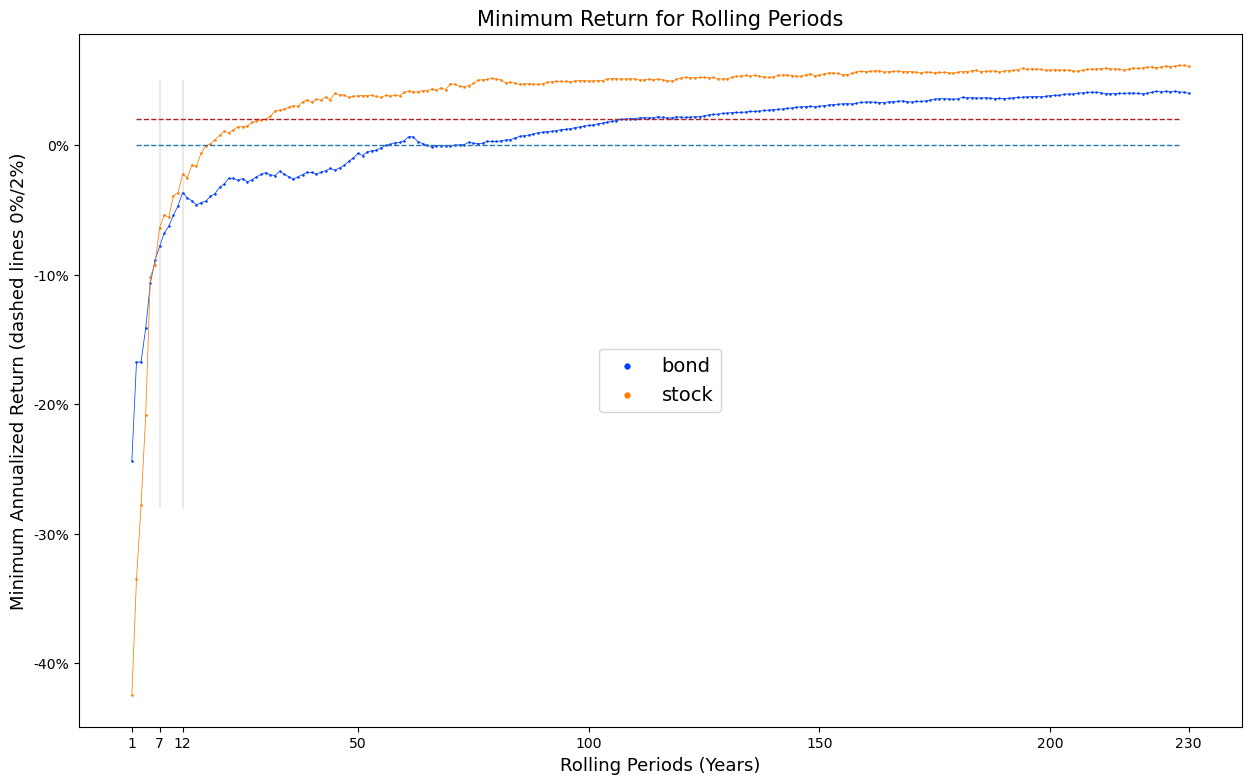

In [48]:
# Finally, we are ready to plot stock and bond cagrs
plt.figure(figsize=(15,9))

ax = sns.pointplot(data=combined_cagr_roll, x='period', y='min_cagr', hue='security_type', scale=.20, palette='bright')
#ax.set(xlabel='Rolling Periods (Years)', ylabel='Minimum Annualized Return (dashed lines 0%/2%)', title='Minimum Return for Rolling Periods')
ax.set_xlabel('Rolling Periods (Years)', fontsize=13)
ax.set_ylabel('Minimum Annualized Return (dashed lines 0%/2%)', fontsize=13)
ax.set_title('Minimum Return for Rolling Periods', fontsize=15)
# convert y-axis ticks to percent
y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
#set x values
ax.set_xticks([0,6,11,49,99,149,199,229])
plt.legend(loc='center', fontsize=14, markerscale=3)

# plot a dashed line level at zero
plt.plot([1, 227], [0, 0], linestyle='--', linewidth=1)
# plot another dashed line at 2
plt.plot([1, 227], [.02, .02], linestyle='--', linewidth=1, color='firebrick', label='1%')
# plot horizontal lines
plt.plot([11, 11], [-.28, .05], linestyle='-', linewidth=.25, color='gray')
plt.plot([6, 6], [-.28, .05], linestyle='-', linewidth=.25, color='gray')

plt.show()

### Years where Stocks/Bonds were at Min/Max for Fixed Periods

- 10/30/50/100 year periods

In [49]:
# Populate a list for security type column to match rolling return dataframes
list_bonds_232 = []
list_stocks_232 = []
year = []
for i in range(232):
    list_bonds_232.append('bond')
    list_stocks_232.append('stock')
    year.append(i+1792)
    
# Check to see that the stock/bond lists are of the same length as the dataframes
#print(len(list_bonds_232))
#print(len(list_stocks_232))
#print(len(year))

In [50]:
# add security type column
rolling_bond_returns.insert(loc=0, column="security_type", value=list_bonds_232)
rolling_stock_returns.insert(loc=0, column="security_type", value=list_stocks_232)

# add year column
rolling_bond_returns.insert(loc=0, column='year', value=year)
rolling_stock_returns.insert(loc=0, column='year', value=year)

#print(rolling_bond_returns.head(2))
#print(rolling_stock_returns.head(2))

In [51]:
# rename the columns so that the stock and bond dataframes have consistent naming
rolling_bond_returns.rename(columns={'rolling_ten_bonds':'rolling_ten','rolling_thirty_bonds':'rolling_thirty','rolling_fifty_bonds':'rolling_fifty',
                                     'rolling_hundred_bonds':'rolling_hundred'}, inplace = True, errors='raise')
rolling_stock_returns.rename(columns={'rolling_ten_stocks':'rolling_ten','rolling_thirty_stocks':'rolling_thirty','rolling_fifty_stocks':'rolling_fifty',
                                      'rolling_hundred_stocks':'rolling_hundred'}, inplace = True, errors='raise')

print(rolling_bond_returns.columns.values)
print(rolling_stock_returns.columns.values)

['year' 'security_type' 'rolling_ten' 'rolling_thirty' 'rolling_fifty'
 'rolling_hundred']
['year' 'security_type' 'rolling_ten' 'rolling_thirty' 'rolling_fifty'
 'rolling_hundred']


In [52]:
# Combine fixed rolling term stock/bond dataframes with a 'Union' style join
combined_fixed_roll = pd.concat([rolling_bond_returns, rolling_stock_returns])

In [53]:
combined_fixed_roll.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464 entries, 0 to 231
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             464 non-null    int64  
 1   security_type    464 non-null    object 
 2   rolling_ten      442 non-null    float64
 3   rolling_thirty   402 non-null    float64
 4   rolling_fifty    362 non-null    float64
 5   rolling_hundred  262 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 25.4+ KB


## Stock/Bond Real Returns

### 10 year annualized real Stock and Bond returns
- Many periods during the 1800's where bonds outperfom stocks while the 1900's show many periods where stocks don't just outperform but outperform bonds by wide margins.   

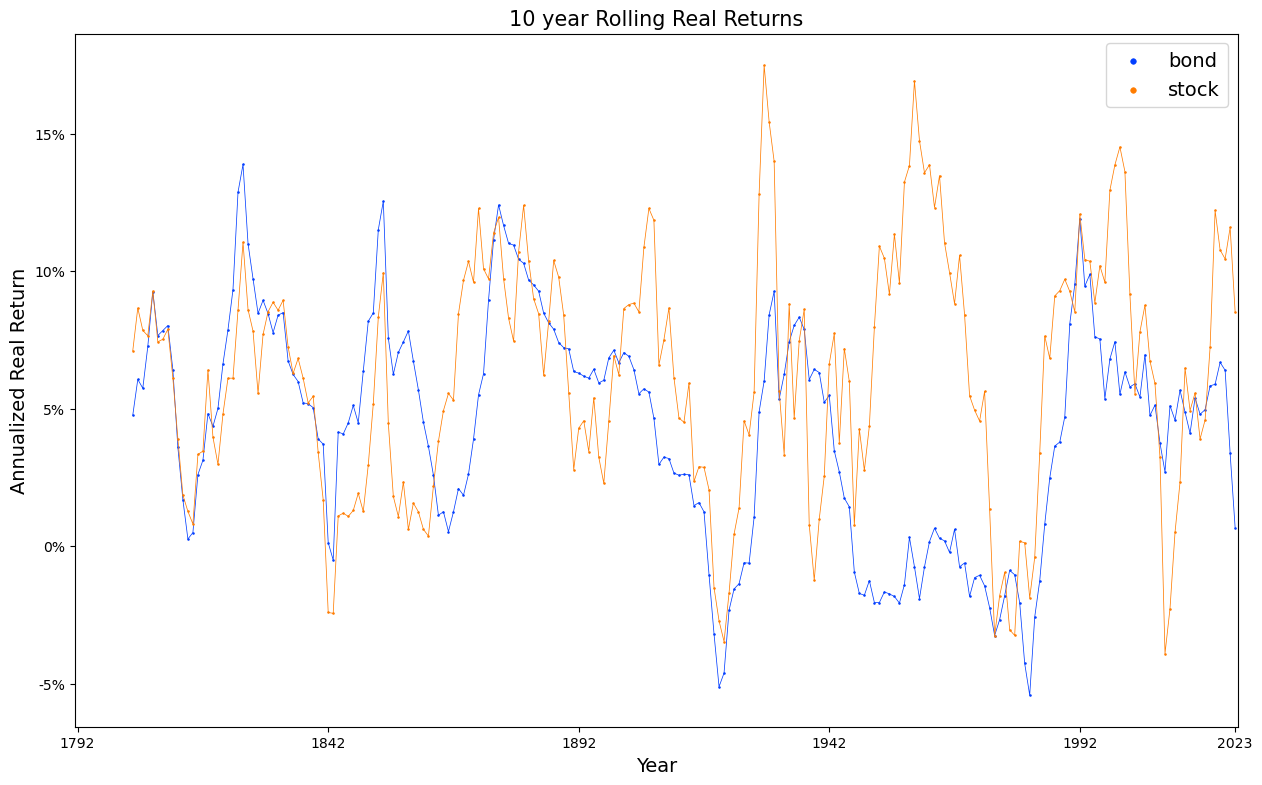

In [54]:
plt.figure(figsize=(15,9))

ax = sns.pointplot(data=combined_fixed_roll, x='year', y='rolling_ten', hue='security_type', scale=.20, palette='bright')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Annualized Real Return', fontsize=14)
ax.set_title('10 year Rolling Real Returns', fontsize=15)
y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_xticks([0,50,100,150,200,231])
plt.legend(loc='upper right', fontsize=14, markerscale=3)

plt.show()

### 30 year annualized real Stock and Bond returns
- Similar to 10 year rolling periods their is a stark difference between the 19th and 20th centuries. With bonds mostly outperforming in the first century and stocks outperfoming, mostly by wide margins, in the 20th century

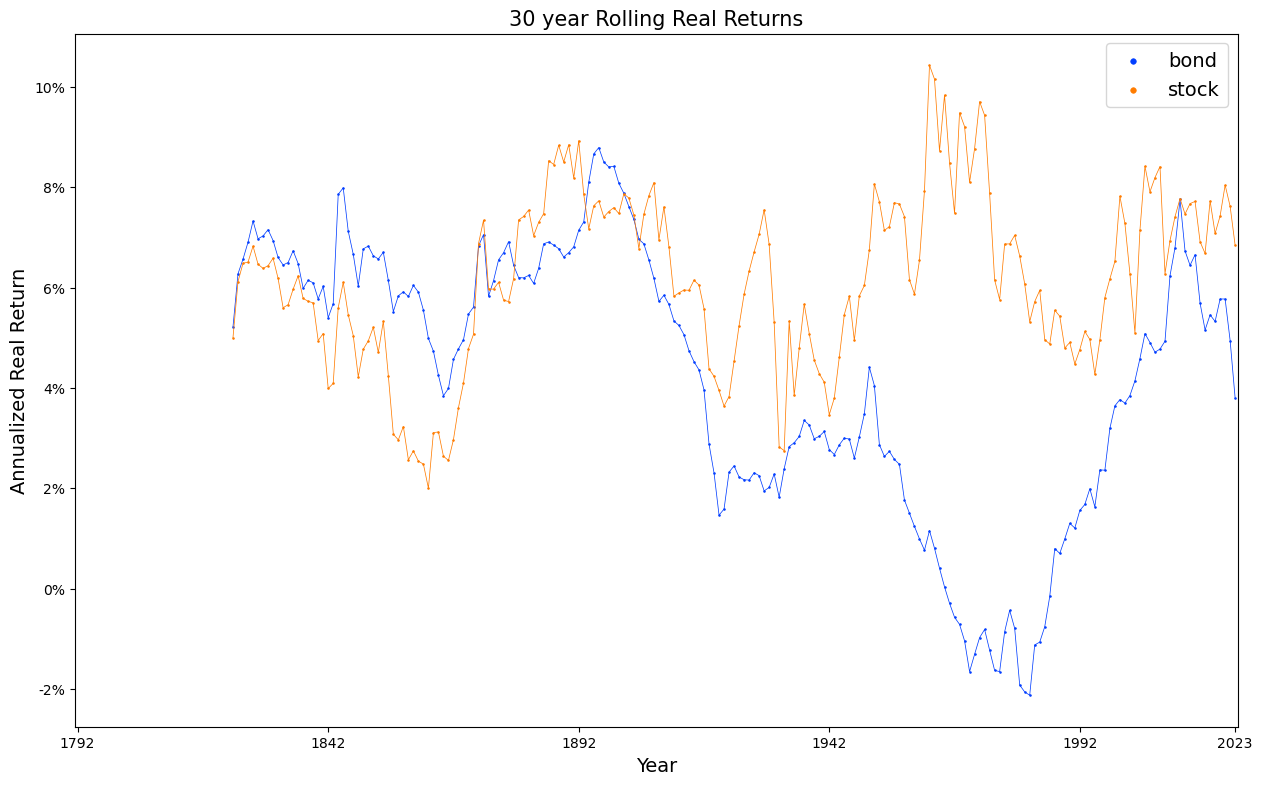

In [56]:
plt.figure(figsize=(15,9))

ax = sns.pointplot(data=combined_fixed_roll, x='year', y='rolling_thirty', hue='security_type', scale=.20, palette='bright')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Annualized Real Return', fontsize=14)
ax.set_title('30 year Rolling Real Returns', fontsize=15)
y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_xticks([0,50,100,150,200,231])
plt.legend(loc='upper right', fontsize=14, markerscale=3)

plt.show()

### 50 year annualized real Stock and Bond returns
- Seems clear now that the best returns for Bonds were in the 19th century and the best returns for Stocks were in the 20th century

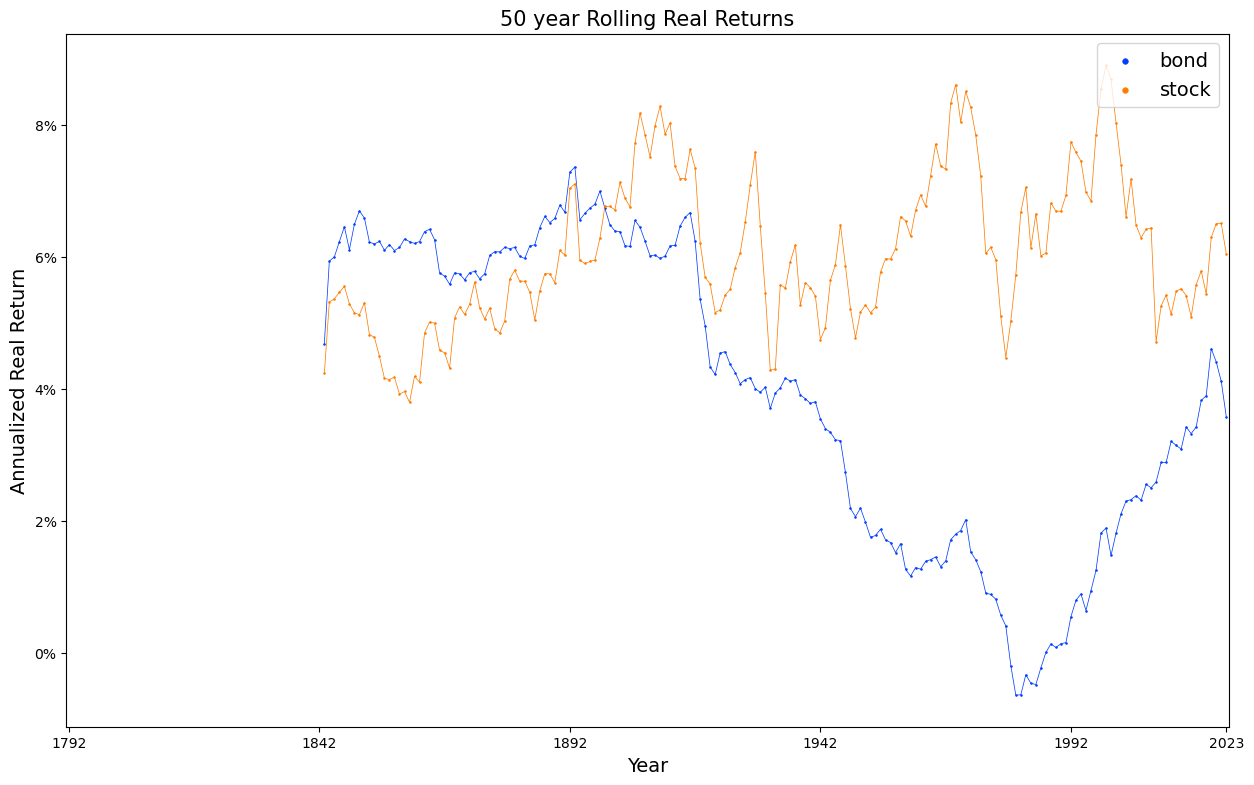

In [58]:
plt.figure(figsize=(15,9))

ax = sns.pointplot(data=combined_fixed_roll, x='year', y='rolling_fifty', hue='security_type', scale=.20, palette='bright')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Annualized Real Return', fontsize=14)
ax.set_title('50 year Rolling Real Returns', fontsize=15)
y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_xticks([0,50,100,150,200,231])
plt.legend(loc='upper right', fontsize=14, markerscale=3)

plt.show()

### 100 year annualized real Stock and Bond returns
- For roughly the first half of US history bonds have performed somewhat in line with stocks on an annualized basis. This perfomance reversed drastically about half-way through the 20th century around the time of World War 2.
- The difference between Stocks and Bonds in the 20th century seems to be primarily due to the underperformance of bonds. If returns to bonds more closely matched those of the 19th century...the difference would not seem so stark. 

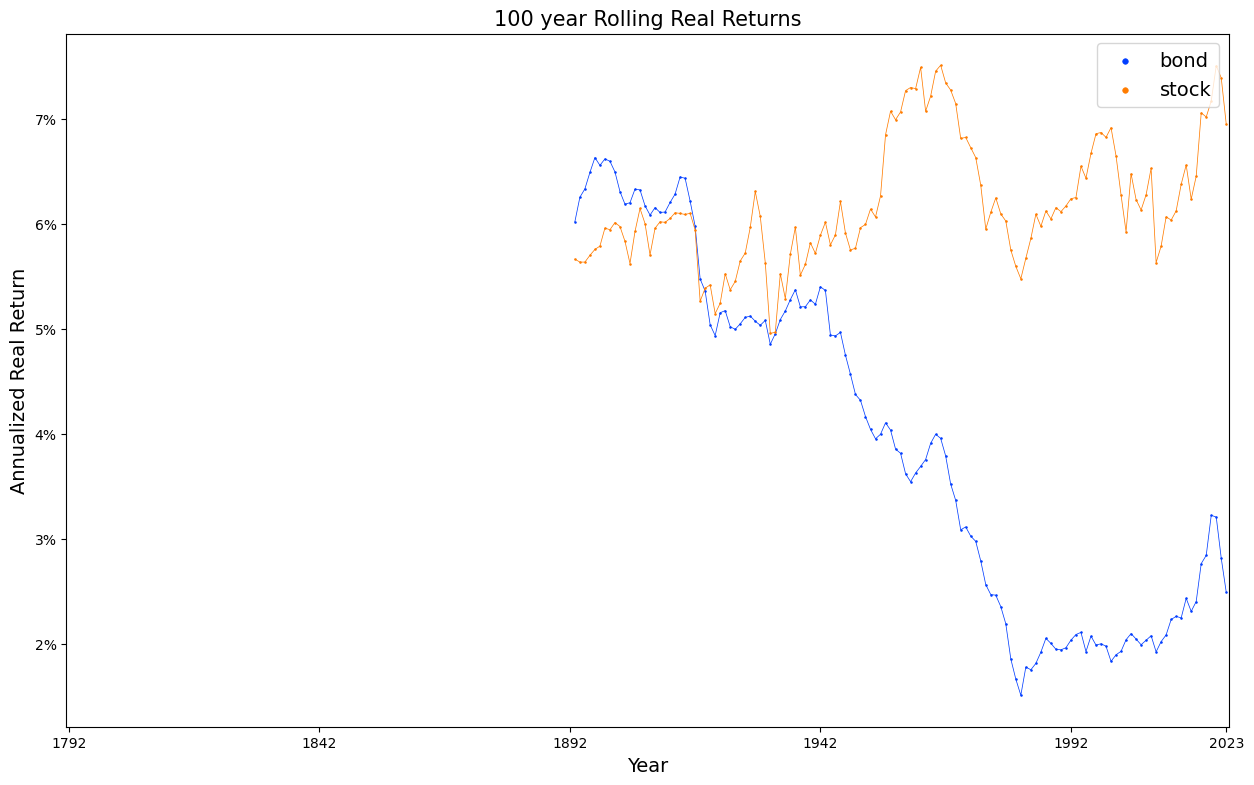

In [60]:
plt.figure(figsize=(15,9))

ax = sns.pointplot(data=combined_fixed_roll, x='year', y='rolling_hundred', hue='security_type', scale=.20, palette='bright')
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Annualized Real Return', fontsize=14)
ax.set_title('100 year Rolling Real Returns', fontsize=15)
y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)
ax.set_xticks([0,50,100,150,200,231])
plt.legend(loc='upper right', fontsize=14, markerscale=3)

plt.show()

###  The highest and lowest returns for stocks and bonds

Bonds generally performed well in the 19th century and poorly in the 20th century. While stocks performed better in the 20th century relative to their performance in the 19th century.

In [61]:
# shorten the name of the dataframe to make it easier to use/read
rbr=rolling_bond_returns
rsr=rolling_stock_returns
# Iterable list of columns
roll_list=['rolling_ten','rolling_thirty','rolling_fifty','rolling_hundred']

### Years where Rolling Returns were Lowest 

Based on annualized rolling return periods.

**Bonds**
- Bonds had their worst returns in the 20th century. 
- Bad returns clustered in the early 1980's for all rolling periods measured(10/30/50/100) 

**Stocks**
- Stocks had their worst performance in the 19th century with the exception of the 10 year return beginning at the height of the tech bubble in 1999 and ending near the lows of the Global Financial Crisis in 2009
- Prior to the 1860's(1860,1862), it was a particularly bad time to have invested in the stock market based on 30yr and 50yr rolling returns.

In [62]:
# Find the years where stock and bonds were at their min value for each rolling series
b_min_years = pd.DataFrame()
s_min_years = pd.DataFrame()
b_min_years = pd.DataFrame()
s_min_years = pd.DataFrame()

# table of lowest rolling returns
for i in roll_list:
    b_min_rows = rbr[rbr[i]==rbr[i].min()]
    b_min_years = pd.concat([b_min_years, b_min_rows])
    s_min_rows = rsr[rsr[i]==rsr[i].min()]
    s_min_years = pd.concat([s_min_years, s_min_rows])
    
min_years = pd.concat([b_min_years,s_min_years])
#min_years

In [63]:
# Dictionary to convert into dataframe table of minimum return years
min_rate_dict = {'Type':[], 'Period':[10,30,50,100,10,30,50,100],
                 'Annual Rate':['-5.41%','-2.13%','-0.64%','1.51%','-3.74%','2.00%','3.80%','4.96%'], 'Years':[]}

for i in range(8):
    min_rate_dict['Type'].append(min_years['security_type'].values[i])
    min_rate_dict['Years'].append(min_years['year'].values[i])

# create a list the reflects a range of years for the rolling periods   
min_yr_list = min_rate_dict['Years']
min_period_list = min_rate_dict['Period']
min_yr_range = []
for i in range(8):
    min_yr_range.append(str(min_yr_list[i]-min_period_list[i]) + "-" + str(min_yr_list[i]) )

# replace years values with the max_yr_range4    
min_rate_dict.update({'Years': min_yr_range})     
    
# load into dataframe/table    
min_rate_year = pd.DataFrame.from_dict(min_rate_dict)
min_rate_year

,Type,Period,Annual Rate,Years
0,bond,10,-5.41%,1972-1982
1,bond,30,-2.13%,1952-1982
2,bond,50,-0.64%,1931-1981
3,bond,100,1.51%,1882-1982
4,stock,10,-3.74%,1999-2009
5,stock,30,2.00%,1832-1862
6,stock,50,3.80%,1810-1860
7,stock,100,4.96%,1832-1932


### Years where Rolling Returns were Highest

Based on annualized rolling return periods.

**Bonds**
- Bonds performed best during rolling periods in the 19th century
**Stocks**
- Stocks had their best returns in the 20th century

In [64]:
# Find the years where stock and bonds were at their max value for eaxh rolling series
b_max_years = pd.DataFrame()
s_max_years = pd.DataFrame()
b_max_years = pd.DataFrame()
s_max_years = pd.DataFrame()

# table of highest rolling returns
for i in roll_list:
    b_max_rows = rbr[rbr[i]==rbr[i].max()]
    b_max_years = pd.concat([b_max_years, b_max_rows])
    s_max_rows = rsr[rsr[i]==rsr[i].max()]
    s_max_years = pd.concat([s_max_years, s_max_rows])
    
max_years = pd.concat([b_max_years,s_max_years])
#max_years

In [65]:
# Dictionary to convert into dataframe table of maximum return years
max_rate_dict = {'Type':[], 'Period':[10,30,50,100,10,30,50,100],
                 'Annual Rate':['13.88%','8.79%','7.36%','6.63%','17.49%','10.43%','8.91%','7.51%'], 'Years':[]}

for i in range(8):
    max_rate_dict['Type'].append(max_years['security_type'].values[i])
    max_rate_dict['Years'].append(max_years['year'].values[i])

# create a list the reflects a range of years for the rolling periods   
max_yr_list = max_rate_dict['Years']
max_period_list = max_rate_dict['Period']
max_yr_range = []
for i in range(8):
    max_yr_range.append(str(max_yr_list[i]-max_period_list[i]) + "-" + str(max_yr_list[i]) )

# replace years values with the max_yr_range4    
max_rate_dict.update({'Years': max_yr_range})  
    
# load into dataframe/table    
max_rate_year = pd.DataFrame.from_dict(max_rate_dict)
max_rate_year

,Type,Period,Annual Rate,Years
0,bond,10,13.88%,1815-1825
1,bond,30,8.79%,1866-1896
2,bond,50,7.36%,1843-1893
3,bond,100,6.63%,1797-1897
4,stock,10,17.49%,1919-1929
5,stock,30,10.43%,1932-1962
6,stock,50,8.91%,1949-1999
7,stock,100,7.51%,1866-1966


In [74]:
#stock_bond_data.info(5)
#min(stock_bond_data['year'])

### Distribution of Best and Worst Years

- Best Years
    - Stocks
    - Bonds

In [66]:
year_min_dict = {"year":[], "min_cagr":[], "term":[]}
year_max_dict = {"year":[], "max_cagr":[], "term":[]}

# i is the period or number of years in the roll period
for i in range(1,101):
    n = i
    cagr = []
    min_year = 0
    max_year = 0
    for x in range(i, 231):
            f = stock_returns.real_stock_index[x+1-n]
            l = stock_returns.real_stock_index[x+1]
            # cagr with roll term = n years
            cagr_x = (l/f)**(1/n)-1
            # create a list of cagr's for the roll term = n
            cagr.append(cagr_x)
            if cagr_x <= min(cagr):
                min_year = 1792+x+1
            if cagr_x >= max(cagr):
                max_year = 1792+x+1
    # min/max cagr for roll term = i in years
    cagr_min = min(cagr)
    cagr_max = max(cagr)
    # populate min/max dictionaries with the year and term
    year_min_dict["year"].append(min_year)
    year_min_dict["min_cagr"].append(cagr_min)
    year_min_dict['term'].append(i)
    year_max_dict["year"].append(max_year)
    year_max_dict["max_cagr"].append(cagr_max)
    year_max_dict['term'].append(i)
    
# Convert the dictionary of roll periods and returns to a dataframe    
year_min_cagr = pd.DataFrame.from_dict(year_min_dict)
year_max_cagr = pd.DataFrame.from_dict(year_max_dict)
#year_max_cagr.head(10)

In [67]:
#year_min_cagr['year'].describe()

In [68]:
# Stocks
year_min_cagr['year'].value_counts().head(10)

year
1921    23
1858    15
1862    13
1860     7
1932     5
1866     4
1933     4
2009     3
1865     3
1982     2
Name: count, dtype: int64

<Axes: xlabel='year', ylabel='Count'>

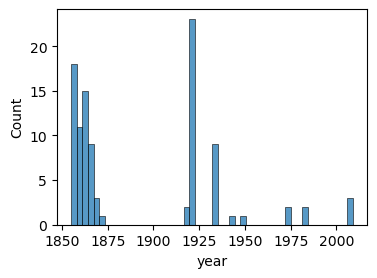

In [72]:
plt.figure(figsize=(4,2.8))
sns.histplot(year_min_cagr['year'], bins=50)
plt.title("Stocks - Worst Periods")

In [53]:
# Stocks
#year_max_cagr['year'].describe()

count     100.00000
mean     1976.53000
std        26.55258
min      1929.00000
25%      1962.00000
50%      1968.00000
75%      2000.00000
max      2023.00000
Name: year, dtype: float64

In [54]:
# Stocks
year_max_cagr['year'].value_counts().head(10)

2000    11
1999    11
1929    10
1962     7
1965     7
1969     7
2001     6
1966     6
1959     4
1961     4
Name: year, dtype: int64

Text(0.5, 1.0, 'Stocks - Best Periods')

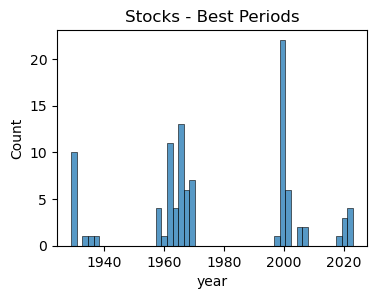

In [74]:
plt.figure(figsize=(4,2.8))
sns.histplot(year_max_cagr['year'], bins=50)
plt.title("Stocks - Best Periods")

### Stocks, Best and Worst Years

In [75]:
# form a combined dataframe of min/max cagr years for 1-100 year terms
s_year_minmax_cagr_dict = {'min/max':[],'year':[]}

for i in range(200):
    if i < 100:
        s_year_minmax_cagr_dict['min/max'].append('min')
        s_year_minmax_cagr_dict['year'].append(year_min_cagr['year'][i])
    if i >= 100:
        s_year_minmax_cagr_dict['min/max'].append('max')
        s_year_minmax_cagr_dict['year'].append(year_max_cagr['year'][i-100])

s_year_minmax_cagr = pd.DataFrame.from_dict(s_year_minmax_cagr_dict)
#s_year_minmax_cagr.sample(10)
#s_year_minmax_cagr['min/max'].value_counts()

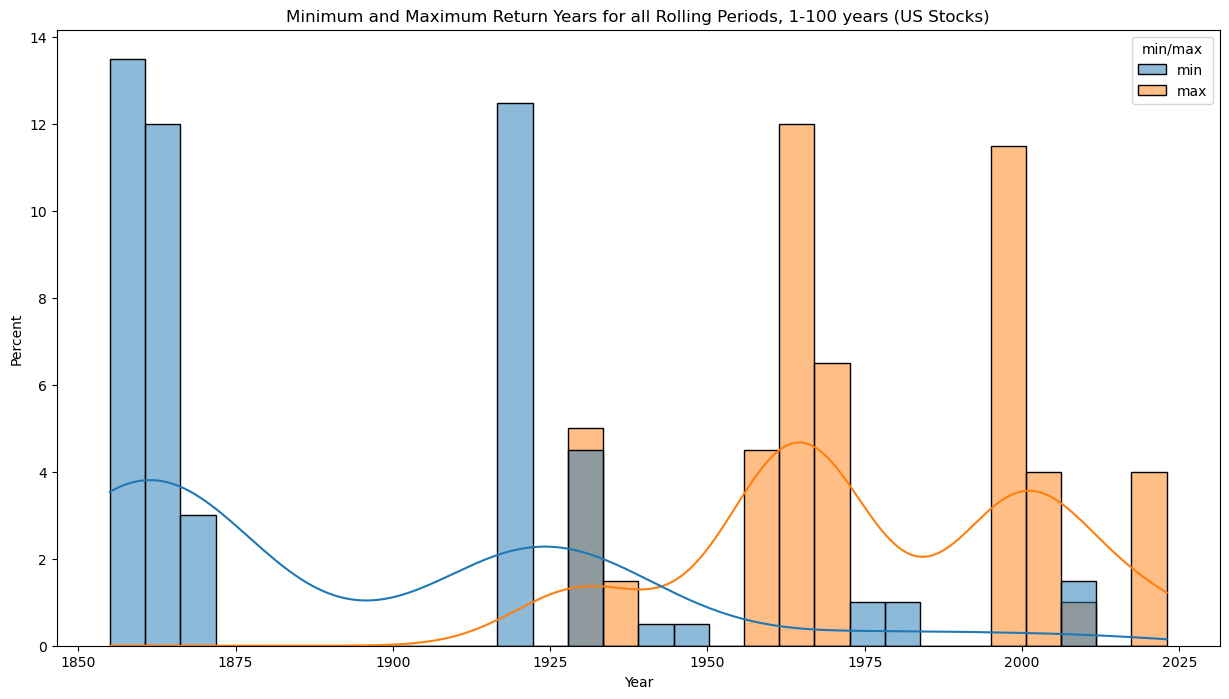

In [76]:
# Histogram comparing all the min and max cagr years for 1-100 year roll periods
plt.figure(figsize=(15,8))

sns.histplot(s_year_minmax_cagr, x='year', hue='min/max', bins=30, kde = True, stat='percent')

plt.title('Minimum and Maximum Return Years for all Rolling Periods, 1-100 years (US Stocks)')
plt.xlabel('Year')
plt.show()

In [77]:
b_year_min_dict = {"year":[], "min_cagr":[], "term":[]}
b_year_max_dict = {"year":[], "max_cagr":[], "term":[]}

# i is the period or number of years in the roll period
for i in range(1,101):
    n = i
    cagr = []
    min_year = 0
    max_year = 0
    for x in range(i, 231):
            f = bond_returns.real_bond_index[x+1-n]
            l = bond_returns.real_bond_index[x+1]
            # cagr with roll term = n years
            cagr_x = (l/f)**(1/n)-1
            # create a list of cagr's for the roll term = n
            cagr.append(cagr_x)
            if cagr_x <= min(cagr):
                min_year = 1792+x+1
            if cagr_x >= max(cagr):
                max_year = 1792+x+1
    # min/max cagr for roll term = i in years
    cagr_min = min(cagr)
    cagr_max = max(cagr)
    # populate min/max dictionaries with the year and term
    b_year_min_dict["year"].append(min_year)
    b_year_min_dict["min_cagr"].append(cagr_min)
    b_year_min_dict['term'].append(i)
    b_year_max_dict["year"].append(max_year)
    b_year_max_dict["max_cagr"].append(cagr_max)
    b_year_max_dict['term'].append(i)
    
# Convert the dictionary of roll periods and returns to a dataframe    
b_year_min_cagr = pd.DataFrame.from_dict(b_year_min_dict)
b_year_max_cagr = pd.DataFrame.from_dict(b_year_max_dict)
#b_year_max_cagr.head(10)

In [59]:
#b_year_min_cagr.describe()

,year,min_cagr,term
count,100.000000,100.000000,100.000000
mean,1976.770000,-0.020333,50.500000
std,16.968691,0.040873,29.011492
min,1918.000000,-0.243606,1.000000
25%,1982.000000,-0.025954,25.750000
50%,1982.000000,-0.007231,50.500000
75%,1982.000000,0.002817,75.250000
max,1982.000000,0.015148,100.000000


In [78]:
b_year_min_cagr['year'].value_counts()

year
1982    82
1920     6
1981     6
1980     2
1975     2
1918     1
1919     1
Name: count, dtype: int64

Text(0.5, 1.0, 'Bonds - Worst Periods')

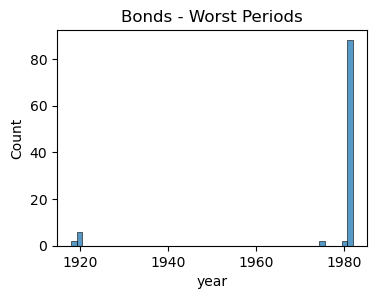

In [79]:
plt.figure(figsize=(4,2.8))
sns.histplot(b_year_min_cagr['year'], bins=50)
plt.title("Bonds - Worst Periods")


In [62]:
#b_year_max_cagr.describe()

,year,max_cagr,term
count,100.000000,100.000000,100.000000
mean,1885.560000,0.094157,50.500000
std,29.037531,0.059026,29.011492
min,1818.000000,0.066300,1.000000
25%,1881.750000,0.071735,25.750000
50%,1892.500000,0.074321,50.500000
75%,1900.000000,0.091331,75.250000
max,1987.000000,0.566734,100.000000


In [63]:
b_year_max_cagr['year'].value_counts()

1902    6
1899    4
1897    4
1895    4
1906    4
       ..
1821    1
1987    1
1986    1
1818    1
1912    1
Name: year, Length: 51, dtype: int64

Text(0.5, 1.0, 'Bonds - Best Periods')

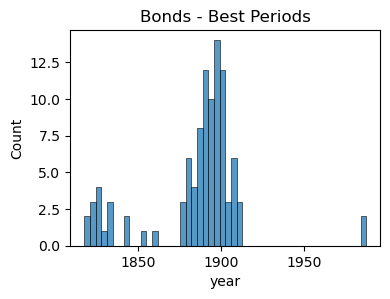

In [80]:
plt.figure(figsize=(4,2.8))
sns.histplot(b_year_max_cagr['year'], bins=50)
plt.title("Bonds - Best Periods")

### Bonds, Best and Worst Years

In [65]:
# form a combined bond dataframe of min/max cagr years for 1-100 year terms
b_year_minmax_cagr_dict = {'min/max':[],'year':[]}

for i in range(200):
    if i < 100:
        b_year_minmax_cagr_dict['min/max'].append('min')
        b_year_minmax_cagr_dict['year'].append(b_year_min_cagr['year'][i])
    if i >= 100:
        b_year_minmax_cagr_dict['min/max'].append('max')
        b_year_minmax_cagr_dict['year'].append(b_year_max_cagr['year'][i-100])

b_year_minmax_cagr = pd.DataFrame.from_dict(b_year_minmax_cagr_dict)
#s_year_minmax_cagr.sample(10)
#s_year_minmax_cagr['min/max'].value_counts()

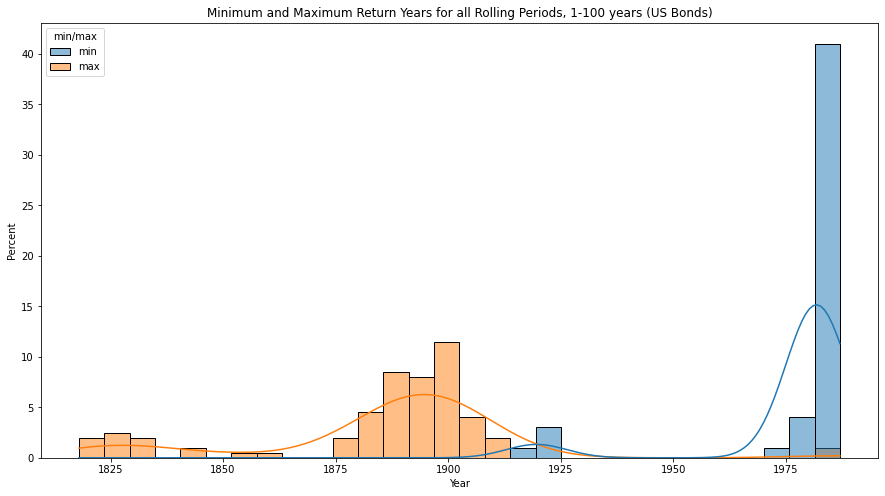

In [66]:
# Histogram comparing all the min and max cagr years for 1-100 year roll periods (Bonds)
plt.figure(figsize=(15,8))

sns.histplot(b_year_minmax_cagr, x='year', hue='min/max', bins=30, kde = True, stat='percent')

plt.title('Minimum and Maximum Return Years for all Rolling Periods, 1-100 years (US Bonds)')
plt.xlabel('Year')
plt.show()

### Bonds and 1982

**Many of the rolling periods of minimum returns for bonds terminate in year 1982.**

- The years preceding 1982 were particulary bad for bond returns over the long term

<AxesSubplot:xlabel='term', ylabel='Count'>

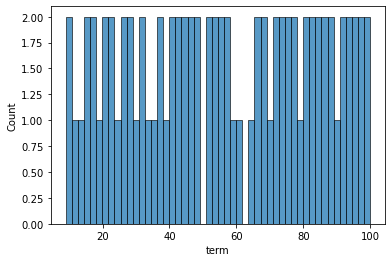

In [67]:
# Find all the terms that end in 1982 for minimum bond return periods
#b_year_min_cagr.sample(10)
b_min_1982 = b_year_min_cagr
b_min_term_1982 = b_min_1982[b_min_1982['year'] == 1982]

sns.histplot(b_min_term_1982['term'], bins=50)

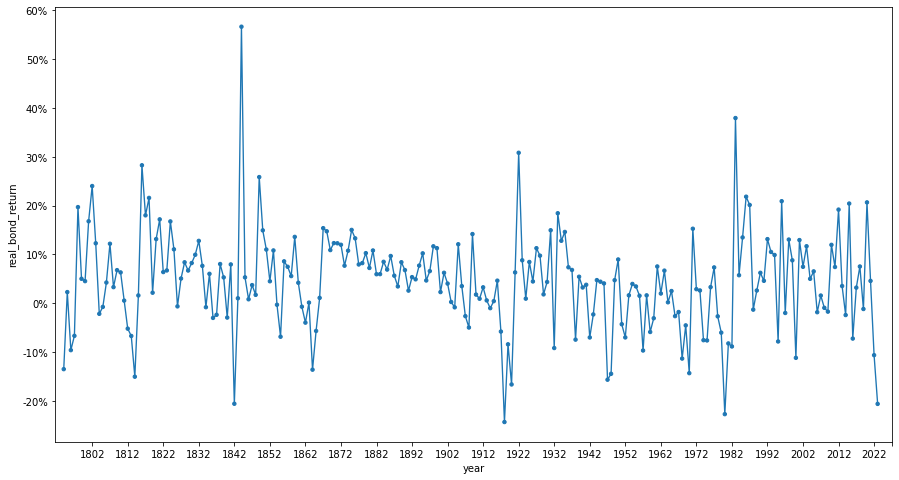

In [68]:
plt.figure(figsize=(15,8))


ax=sns.pointplot(data=stock_bond_data, x='year', y='real_bond_return', linestyle='--', scale=.5)
ax.set_xticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,235])
y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.show()

There is alot of noise in these annual returns. Let's see the same plot using 5 year smoothed returns (Annual Compounded Returns).

And as you can see below, there is a significant cluster of low returns from the late 1930's to the early 1980's. 

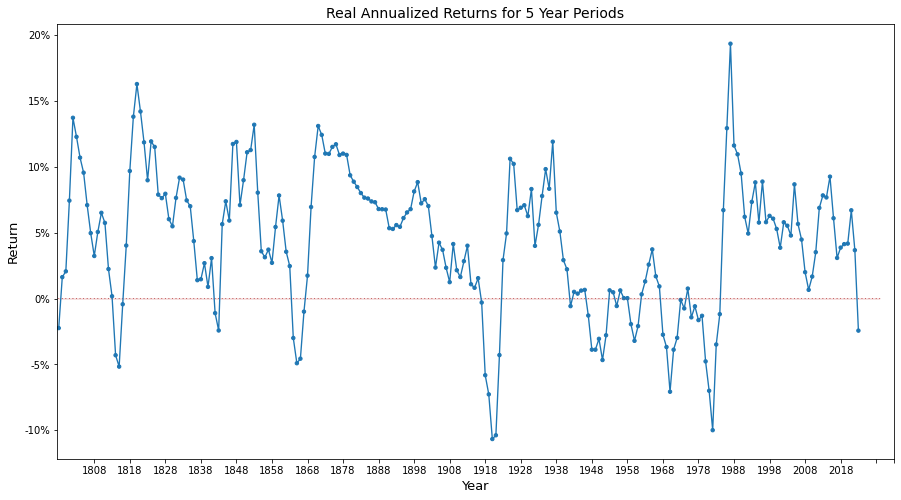

In [69]:
# Lets smooth this out a bit by using 'i' year annualized rolling returns. Change the i variable to adjust the period for the graph.
b_period_cagr_dict = {"year":[], "bond_cagr":[]}

# i is the period or number of years in the roll period
i = 5
n = i
cagr = []
for x in range(i, 231):
        f = bond_returns.real_bond_index[x+1-n]
        l = bond_returns.real_bond_index[x+1]
        # cagr with roll term = n years
        cagr_x = (l/f)**(1/n)-1
        # populate dictionaries with the year and cagr for the roll term = n
        b_period_cagr_dict["bond_cagr"].append(cagr_x)
        b_period_cagr_dict["year"].append(1792+x+1)
    
# Convert the dictionary of roll periods and returns to a dataframe    
b_period_cagr = pd.DataFrame.from_dict(b_period_cagr_dict)

#b_period_cagr.tail(10)
#stock_bond_data['year']
plt.figure(figsize=(15,8))

x=[x for x in range(232)]
y=[0 for i in range(232)]

sns.pointplot(x=x, y=y, linestyle=':', color='firebrick', scale=.1)

ax=sns.pointplot(data=b_period_cagr, x='year', y='bond_cagr', linestyle='--', scale=.5)
ax.set_xticks([10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,235])
y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_value)

plt.title("Real Annualized Returns for " + str(i) + ' Year Periods', fontsize=14)
plt.xlabel("Year", fontsize=13)
plt.ylabel("Return", fontsize=13)
plt.show()


**10/30/50/100 Fixed rolling returns, Boxed Plots

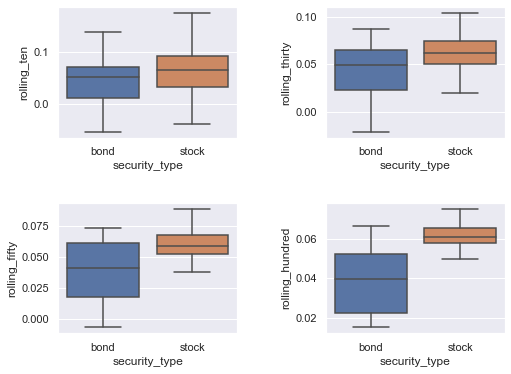

In [70]:
# Use subplots to show boxplots of rolling returns
col_list = ['rolling_ten','rolling_thirty','rolling_fifty','rolling_hundred']

sns.set()

fig, axes = plt.subplots(2,2)
fig.set_size_inches(8,6)
fig.subplots_adjust(wspace=.5, hspace=.5)

i = 0
for k in range(2):
    for j in range(2):
        sns.boxplot(data=combined_fixed_roll, y=col_list[i], x='security_type', ax=axes[k,j])        
        y_value=['{:,.0f}'.format(100*x) + '%' for x in ax.get_yticks()]
        ax.set_yticklabels(y_value)
        i+=1
        